In [1]:
#import necessary library
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
test_DF = pd.read_csv("C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/NCF results/test_DF.csv", sep = "\t", encoding= "utf-8")
test_DF.head()

,pid,track_id,label
0,102312,310283,1
1,14157,26349,1
2,113235,312440,1
3,129834,20220,1
4,124700,16483,1


In [3]:
def makeDF(testDF, predictionsDF):
    pred_df = pd.DataFrame({
    'user_id': np.array(testDF['pid']),
    'item_id': np.array(testDF["track_id"]),
    'prediction': predictionsDF.flatten()
    })
    return pred_df

In [4]:
os.listdir("C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/NCF results/")[:5]

['HR_NDCG.xlsx',
 'latent_128.npy',
 'latent_128.pkl',
 'latent_16.npy',
 'latent_16.pkl']

In [5]:
latent_hist = []
list_direc = os.listdir("C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/NCF results/")
for direct in list_direc:
    if direct.startswith('latent') and direct.endswith('pkl'):
        path = 'C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/NCF results/' + direct
        basename, _ = direct.split(".")
        with open(path, 'rb') as f:
            fread = pickle.load(f)
        latent_hist.append({str(basename): fread})

In [6]:
MLP_hist = []
list_direc = os.listdir("C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/NCF results/")
for direct in list_direc:
    if direct.startswith('MLP') and direct.endswith('pkl'):
        path = 'C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/NCF results/' + direct
        basename, _ = direct.split(".")
        with open(path, 'rb') as f:
            fread = pickle.load(f)
        MLP_hist.append({str(basename): fread})

In [7]:
loss_dict_latent = {}
for dict_ in latent_hist:
    wrapper = {}
    epochs = np.arange(1, 21, 1)
    wrapper['epochs'] = epochs
    for key, loss_value in dict_.items():
        loss_ = loss_value["loss"]
        wrapper['loss'] = loss_
    loss_dict_latent[key] = pd.DataFrame(wrapper)

In [8]:
loss_dict_MLP = {}
for dict_ in MLP_hist:
    wrapper = {}
    epochs = np.arange(1, 21, 1)
    wrapper['epochs'] = epochs
    for key, loss_value in dict_.items():
        loss_ = loss_value["loss"]
        wrapper['loss'] = loss_
    loss_dict_MLP[key] = pd.DataFrame(wrapper)

In [9]:
loss_dict_MLP.keys()

dict_keys(['MLP_0', 'MLP_1', 'MLP_2', 'MLP_3', 'MLP_4', 'MLP_5', 'MLP_6'])

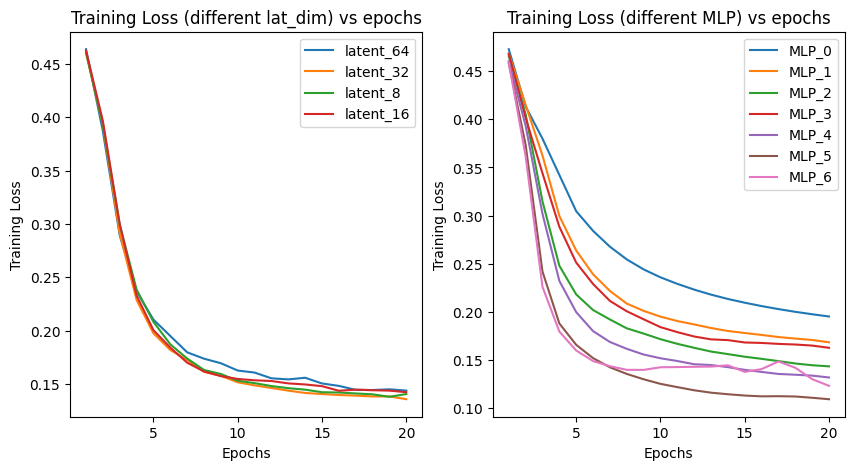

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot the first subplot
ax[0].plot(loss_dict_latent['latent_64']['epochs'], loss_dict_latent['latent_64']['loss'], label='latent_64')
ax[0].plot(loss_dict_latent['latent_32']['epochs'], loss_dict_latent['latent_32']['loss'], label='latent_32')
ax[0].plot(loss_dict_latent['latent_8']['epochs'], loss_dict_latent['latent_8']['loss'], label='latent_8')
ax[0].plot(loss_dict_latent['latent_16']['epochs'], loss_dict_latent['latent_16']['loss'], label='latent_16')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training Loss')
ax[0].set_title('Training Loss (different lat_dim) vs epochs')
ax[0].legend()

# plot the second subplot
ax[1].plot(loss_dict_MLP['MLP_0']['epochs'], loss_dict_MLP['MLP_0']['loss'], label='MLP_0')
ax[1].plot(loss_dict_MLP['MLP_1']['epochs'], loss_dict_MLP['MLP_1']['loss'], label='MLP_1')
ax[1].plot(loss_dict_MLP['MLP_2']['epochs'], loss_dict_MLP['MLP_2']['loss'], label='MLP_2')
ax[1].plot(loss_dict_MLP['MLP_3']['epochs'], loss_dict_MLP['MLP_3']['loss'], label='MLP_3')
ax[1].plot(loss_dict_MLP['MLP_4']['epochs'], loss_dict_MLP['MLP_4']['loss'], label='MLP_4')
ax[1].plot(loss_dict_MLP['MLP_5']['epochs'], loss_dict_MLP['MLP_5']['loss'], label='MLP_5')
ax[1].plot(loss_dict_MLP['MLP_6']['epochs'], loss_dict_MLP['MLP_6']['loss'], label='MLP_6')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training Loss')
ax[1].set_title('Training Loss (different MLP) vs epochs')
ax[1].legend()

plt.show()
